In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import neurokit2 as nk
import scipy
import wfdb
from dsp import DSP
from pathlib import Path


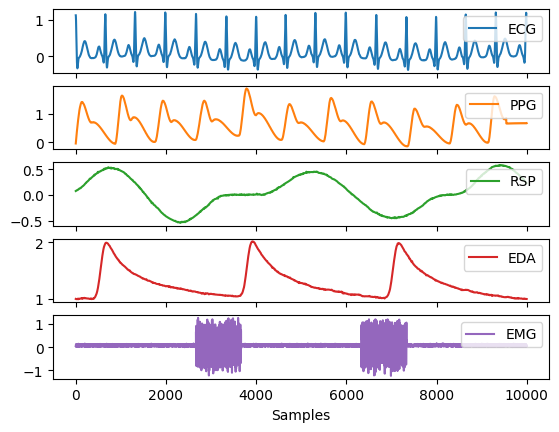

In [20]:
# Generate synthetic signals
ecg = nk.ecg_simulate(duration=10, heart_rate=90)
ppg = nk.ppg_simulate(duration=10, heart_rate=70)
rsp = nk.rsp_simulate(duration=10, respiratory_rate=15)
eda = nk.eda_simulate(duration=10, scr_number=3)
emg = nk.emg_simulate(duration=10, burst_number=2)

# Visualise biosignals
data = pd.DataFrame({"ECG": ecg,
                     "PPG": ppg,
                     "RSP": rsp,
                     "EDA": eda,
                     "EMG": emg})
nk.signal_plot(data, subplots=True)

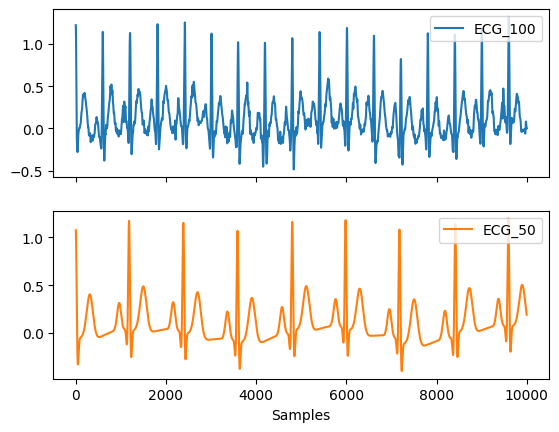

In [53]:
# Alternate heart rate and noise levels
ecg50 = nk.ecg_simulate(duration=10, noise=0.0, heart_rate=50)  
ecg100 = nk.ecg_simulate(duration=10, noise=0.1, heart_rate=100)

# Visualize
ecg_df = pd.DataFrame({"ECG_100": ecg100, "ECG_50": ecg50})

nk.signal_plot(ecg_df, subplots=True)

In [56]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [57]:
ecg_tensor = torch.from_numpy(ecg50)

In [58]:
ecg_tensor.shape

torch.Size([10000])

In [59]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class SincNet:
    def __init__(self):
        pass

    def my_max_pool_1d(x, kernel_size, stride, padding):
        """
        Performs max pooling on 1D data (e.g., ECG signals).
        
        Args:
            x: torch tensor with size (N, C_in, L_in), where:
            - N: batch size
            - C_in: number of input channels
            - L_in: input signal length
            kernel_size: size of the window to take a max over
            stride: stride of the window
            padding: implicit zero padding to be added on both sides

        Returns:
            y: torch tensor of size (N, C_in, L_out), where:
            - L_out is computed as: floor((L_in + 2 * padding - kernel_size) / stride) + 1
        """

        N, C_in, L_in = x.shape  # Extract shape

        # Pad tensor if required
        if padding > 0:
            pad_length = L_in + 2 * padding
            tensor_padded = torch.zeros((N, C_in, pad_length), device=x.device)
            tensor_padded[:, :, padding:padding + L_in] = x
        else:
            tensor_padded = x

        # Calculate output length
        L_out = int(np.floor((L_in + 2 * padding - kernel_size) / stride) + 1)

        # Unfold tensor into sliding windows (equivalent to img2col for 1D)
        tensor_col = tensor_padded.unfold(dimension=2, size=kernel_size, step=stride)  # Shape: (N, C_in, L_out, kernel_size)

        # Perform max pooling
        y, _ = torch.max(tensor_col, dim=3)  # Take max along the last dimension (kernel window)

        return y  # Output shape: (N, C_in, L_out)



In [61]:
sincnet = SincNet()
test = sincnet.my_max_pool_1d(ecg_tensor, 3, 1, 0)

TypeError: SincNet.my_max_pool_1d() takes 4 positional arguments but 5 were given